In [1]:
import numpy as np
import pandas as pd

from processing import process_embedding_from_words
from taxonomy import (phi_edge, build_state, proba_state, TaxonomyModule,
                    plot_state_likelihood_and_gradient, plot_nx_graph)

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Training data

train_words = [
    "vertebrate", "mammal", "placental", "cow", "rodent", "rat", "metatherian",
    "marsupial", "kangaroo", "reptile", "diapsid", "squirrel", "snake",
    "crocodilian", "anapsid", "chelonian", "turtle"
]

train_embedd = process_embedding_from_words(train_words)

Loading world2vec model...
Loaded.
List of world not in world2vec: {'metatherian', 'chelonian', 'anapsid'}


In [3]:
train_df_graph = pd.DataFrame(index=train_words, columns=train_words)
train_df_graph.loc["vertebrate", "mammal"] = 1
train_df_graph.loc["vertebrate", "reptile"] = 1
train_df_graph.loc["mammal", "placental"] = 1
train_df_graph.loc["mammal", "metatherian"] = 1
train_df_graph.loc["placental", "cow"] = 1
train_df_graph.loc["placental", "rodent"] = 1
train_df_graph.loc["rodent", "squirrel"] = 1
train_df_graph.loc["rodent", "rat"] = 1
train_df_graph.loc["metatherian", "marsupial"] = 1
train_df_graph.loc["marsupial", "kangaroo"] = 1
train_df_graph.loc["reptile", "diapsid"] = 1
train_df_graph.loc["reptile", "anapsid"] = 1
train_df_graph.loc["diapsid", "snake"] = 1
train_df_graph.loc["diapsid", "crocodilian"] = 1
train_df_graph.loc["anapsid", "chelonian"] = 1
train_df_graph.loc["chelonian", "turtle"] = 1
train_df_graph = train_df_graph.fillna(0)

train_df_graph.head()

,vertebrate,mammal,placental,cow,rodent,rat,metatherian,marsupial,kangaroo,reptile,diapsid,squirrel,snake,crocodilian,anapsid,chelonian,turtle
vertebrate,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
mammal,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
placental,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
cow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rodent,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [4]:
w = np.random.randn(train_embedd.shape[-1] + 1)
phi_edge(0, 1, w, train_embedd, y=1), phi_edge(0, 1, w, train_embedd, y=0)

(0.004459191165434429, 1)

In [5]:
w = np.random.randn(train_embedd.shape[-1] + 1)
train_state = build_state(train_words, train_df_graph)
proba_state(w, train_state, train_words, train_embedd)

-1386.3242549220902

In [6]:
dim_embedding = train_embedd.shape[-1]
proba_state(np.zeros(dim_embedding+1), train_state, train_words, train_embedd), (len(train_words)**2 - len(train_words))*np.log(0.5)

(-188.5360331123055, -188.53603311230512)

### Plots


100%|██████████| 2/2 [00:03<00:00,  1.65s/it]


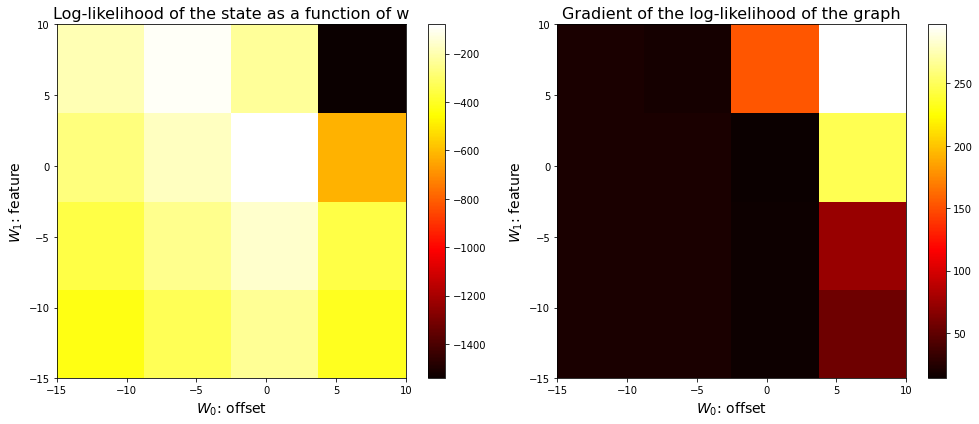

In [7]:
W_X, W_Y = np.meshgrid(np.linspace(-15, 10, 5), np.linspace(-15, 10, 5))

plot_state_likelihood_and_gradient(
    train_state, train_words, train_embedd, W_X, W_Y)

## Visualization

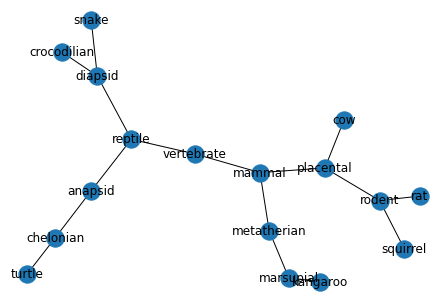

In [8]:
plot_nx_graph(w=np.array([-3, 6]), words=train_words, embedding=np.array(train_df_graph));

### Training procedure

In [20]:
taxonomy_module = TaxonomyModule()

In [38]:
nb_epochs = 10000
lr = 0.1
taxonomy_module.train(train_df_graph, nb_epochs, lr=None)

Embedding already charged
Launching 3 jobs with new suggestions
(8_w,17)-aCMA-ES (mu_w=5.1,w_1=31%) in dimension 103 (seed=nan, Sat Mar  6 17:21:53 2021)
Updating fitness with value 193.67091409410423
Updating fitness with value 121.88005787363375
Updating fitness with value 128.50864462823372
97 remaining budget and 0 running jobs
Launching 3 jobs with new suggestions
Updating fitness with value 256.2618266028038
Updating fitness with value 416.80568811989195
Updating fitness with value 1203.3307425680064
94 remaining budget and 0 running jobs
Launching 3 jobs with new suggestions
Updating fitness with value 179.5823598546864
Updating fitness with value 315.03611776552646
Updating fitness with value 998.7801608933403
91 remaining budget and 0 running jobs
Launching 3 jobs with new suggestions
Updating fitness with value 189.97761537950785
Updating fitness with value 1194.2191999720646
Updating fitness with value 438.7704161468041
88 remaining budget and 0 running jobs
Launching 3 jobs

In [41]:
nb_epochs = 10
lr = 0.001
taxonomy_module.train(train_df_graph, nb_epochs, lr=lr)

Embedding already charged
100%|██████████| 103/103 [00:49<00:00,  2.09it/s]
[Epoch 1]: -80.61
100%|██████████| 103/103 [00:51<00:00,  2.00it/s]
[Epoch 2]: -78.18
100%|██████████| 103/103 [00:48<00:00,  2.10it/s]
[Epoch 3]: -77.09
100%|██████████| 103/103 [00:48<00:00,  2.13it/s]
[Epoch 4]: -76.53
100%|██████████| 103/103 [00:47<00:00,  2.17it/s]
[Epoch 5]: -76.20
100%|██████████| 103/103 [00:44<00:00,  2.32it/s]
[Epoch 6]: -75.98
100%|██████████| 103/103 [00:44<00:00,  2.31it/s]
[Epoch 7]: -75.81
100%|██████████| 103/103 [00:44<00:00,  2.33it/s]
[Epoch 8]: -75.67
100%|██████████| 103/103 [00:43<00:00,  2.36it/s]
[Epoch 9]: -75.55
100%|██████████| 103/103 [00:48<00:00,  2.13it/s][Epoch 10]: -75.43



In [33]:
taxonomy_module.w #-3.08

array([-1.67879266,  0.18419915,  0.71724789,  1.41180916,  0.36603282,
        0.08708454, -0.40546383, -1.79991229,  0.16754452,  0.41806421,
        0.28673289, -0.88263972, -0.56742143,  1.04911033,  0.33493335,
       -0.27535114, -0.39781853, -0.30381402, -1.17778541,  0.63036835,
       -0.7532564 ,  0.31066562, -0.78846565, -1.21876628, -0.04272208,
       -0.37288879, -1.04371483, -0.20003778, -1.24739224, -0.4194786 ,
        2.52782183, -0.45613771,  0.75146968,  1.43256338, -0.41923762,
       -0.1115041 ,  1.91178423, -1.44926663,  1.55243518,  0.04229567,
        1.12948637,  0.23828287,  0.45753764,  0.44940942,  1.02513359,
       -0.4256557 , -0.11823796, -1.86323141, -1.46668905,  0.88055574,
        0.65279985, -0.27553393,  0.02344994,  0.83025481,  0.16447909,
       -0.21072186,  0.65225785,  0.05071932,  0.63023251, -0.00732062,
       -0.67948607, -0.56725681,  1.27928078,  0.93291306, -0.60562556,
        1.33516093,  0.60019271, -0.12666637, -0.35762529, -0.91

In [39]:
taxonomy_module.f1_score(train_df_graph)

Embedding already charged


0.1176470537716265

Embedding already charged
V_vertebrate_mammal 0.08273149144047932
V_vertebrate_placental 0.2012775557598071
V_vertebrate_cow 0.0703378417314991
V_vertebrate_rodent 0.07969062461022448
V_vertebrate_rat 0.050972381217083765
V_vertebrate_metatherian 0.11536901640679639
V_vertebrate_marsupial 0.04500679330218488
V_vertebrate_kangaroo 0.04935169028956555
V_vertebrate_reptile 0.037422047002520435
V_vertebrate_diapsid 0.06272143666749957
V_vertebrate_squirrel 0.0373856331033894
V_vertebrate_snake 0.09038416988995995
V_vertebrate_crocodilian 0.08751679339528406
V_vertebrate_anapsid 0.11536901640679639
V_vertebrate_chelonian 0.11536901640679639
V_vertebrate_turtle 0.14837578444634497
V_mammal_vertebrate 0.033666622300026885
V_mammal_placental 0.4706864768743946
V_mammal_cow 0.2107232532341502
V_mammal_rodent 0.2340435726868226
V_mammal_rat 0.15933102829069448
V_mammal_metatherian 0.3151621570606996
V_mammal_marsupial 0.14258902422023914
V_mammal_kangaroo 0.15482710153197976
V_mammal_reptile 0.1

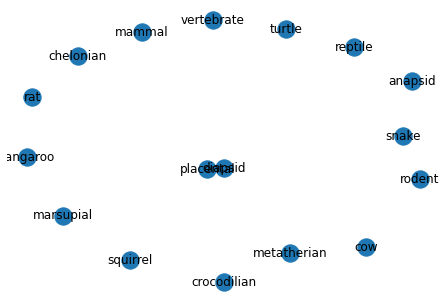

In [35]:
taxonomy_module.infer_graph(train_words, verbose=True);

Loading world2vec model...
Loaded.
List of world not in world2vec: {'metatherian', 'chelonian', 'anapsid'}


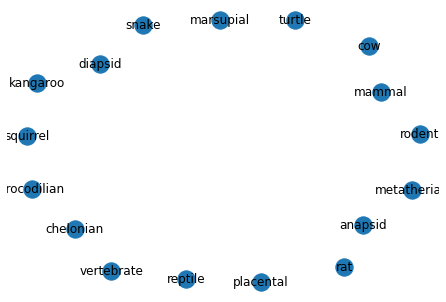

In [13]:
taxonomy_module.infer_graph(train_df_graph);

### Kirchhoff’s Matrix Tree Theorem (MTT)

In [14]:
from networkx.linalg.laplacianmatrix import laplacian_matrix
L_matrix = laplacian_matrix(G).todense()
nb_covering_trees = np.linalg.det(L_matrix[1:,1:])
nb_covering_trees

NameError: name 'G' is not defined

## Gensim Tests

In [3]:
import gensim.downloader as api
corpus = api.load('text8')
print(api.load('glove-wiki-gigaword-50', return_path=True))

[==================================================] 100.0% 31.6/31.6MB downloaded
[==================================================] 100.0% 66.0/66.0MB downloaded
C:\Users\charb/gensim-data\glove-wiki-gigaword-50\glove-wiki-gigaword-50.gz


In [9]:
model = api.load("glove-wiki-gigaword-50")

In [12]:
model.word_vec("cat").shape

(50,)